<a href="https://colab.research.google.com/github/Shaunak-Mukherjee/ECE-59500---Reinforcement-Learning--Theory-and-Algorithms/blob/main/ECE_59500_Reinforcement_Learning_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


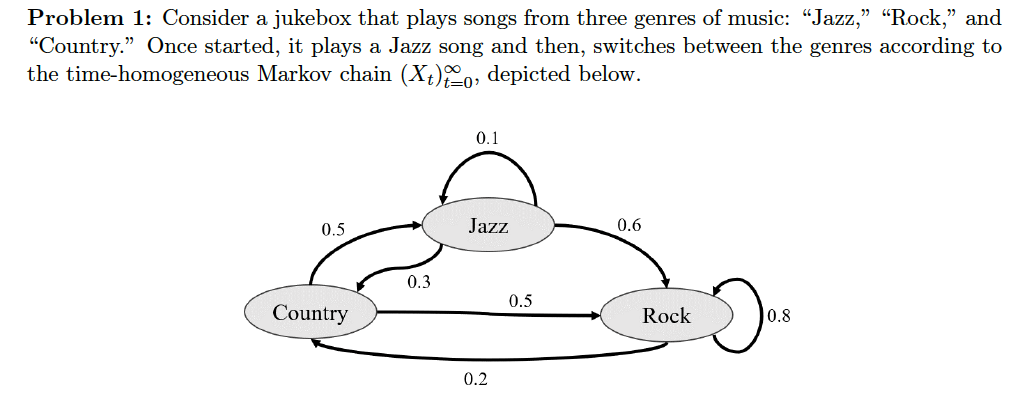

Question P1.3 With what probabilities will the third song (at t = 2) belong to each of these three genres ?



**Answer:**

In [5]:
states = ["Jazz", "Rock", "Country"] # State Space
import numpy as np

P_matrix = np.array(
    [[0.1, 0.6, 0.3],
    [0.0, 0.8, 0.2],
    [0.5, 0.5, 0.0],])

mu0 = np.array([1.0, 0.0, 0.0])
mu2 = mu0 @ np.linalg.matrix_power(P_matrix, 2)

print("mu_2 (t=2) distribution is [Jazz, Rock, Country]:", mu2)

mu_2 (t=2) distribution is [Jazz, Rock, Country]: [0.16 0.69 0.15]


Question P1.4 This Markov chain is ergodic and hence, has a unique stationary (steady-state) distribution $\overline{μ}$. Compute $\overline{μ}$ by hand, calculator, or code; show the steps you use in the computation

**Answer:**

In [6]:
import numpy as np
n = P_matrix.shape[0]

# Build linear system for stationary μ: We solve (P^T - I) μ^T = 0
M = P_matrix.T - np.eye(n) # Transpose of P minus identity matrix
M[-1, :] = 1.0 # Replace last row with [1, 1, 1] for normalization
b = np.zeros(n) # Right-hand side vector
b[-1] = 1.0 # Set last element to 1 for sum = 1

# Solve
mu_bar_T = np.linalg.solve(M, b)
mu_bar = mu_bar_T.T

# Display
print("Stationary Distribution (mu_bar)")
print(mu_bar)

genres = ["Jazz", "Rock", "Country"]
print("Long-Term Probabilities")
for genre, prob in zip(genres, mu_bar):
    print(f" {genre:<8}: {prob:.1%}")

Stationary Distribution (mu_bar)
[0.09708738 0.72815534 0.17475728]
Long-Term Probabilities
 Jazz    : 9.7%
 Rock    : 72.8%
 Country : 17.5%


Question P1.5 Consider the consecutive update of the state distribution μt from t = 0 to t = 100. Plot the sequence of differences between the state distribution $μ_t$ and the stationary distribution $\overline{μ}$, measured using $L1$ norm, with respect to the time steps.

**Answer:**

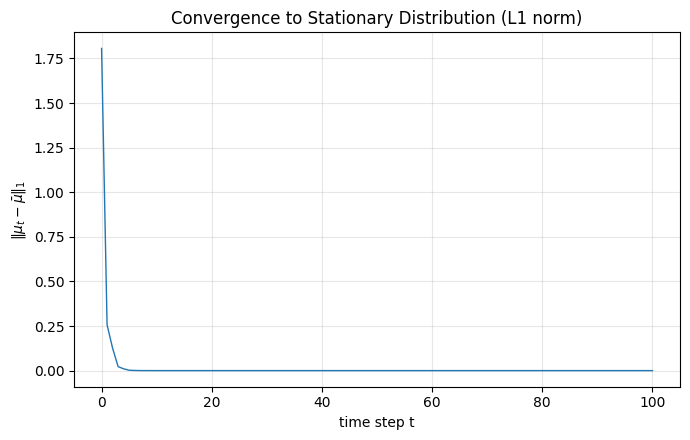

In [7]:
import matplotlib.pyplot as plt

mu = mu0.copy()
ts = list(range(0, 101))   # timesteps
l1_vals = []
# Compute L1 distance at each t and update mu_{t+1} = mu_t P
for t in ts:
  l1_vals.append(np.linalg.norm(mu - mu_bar, 1))
  mu = mu @ P_matrix # Markov update (row vector times P)

# Plot
plt.figure(figsize=(7, 4.5))
plt.plot(ts, l1_vals, linewidth=1)
plt.xlabel("time step t")
plt.ylabel(r"$\| \mu_t - \bar{\mu} \|_1$")
plt.title("Convergence to Stationary Distribution (L1 norm)")
plt.grid(True, alpha=0.3)
plt.tight_layout()

Problem P1.6
If we start the jukebox and let it play for a very long time, which genre do you expect to be
played most often? Explain your reasoning.

**Answer**
The genre expected to be played most often in the long run is **Rock**.
Since the Markov chain is ergodic, it has a unique stationary distribution
$\bar{\mu}$ that gives the long-term proportion of time spent in each state
(genre), independent of the starting state. The stationary distribution is
obtained by solving $\bar{\mu} P = \bar{\mu}$ with the normalization
$\bar{\mu}_J + \bar{\mu}_R + \bar{\mu}_C = 1$ which was implemented in prob1.4

Jazz: $\displaystyle \approx 0.097$
Rock: $\displaystyle  \approx 0.728$
Country: $\displaystyle \approx 0.175$


So, Rock has the highest stationary probability ($\approx 72.8\%$) and will be played most often.


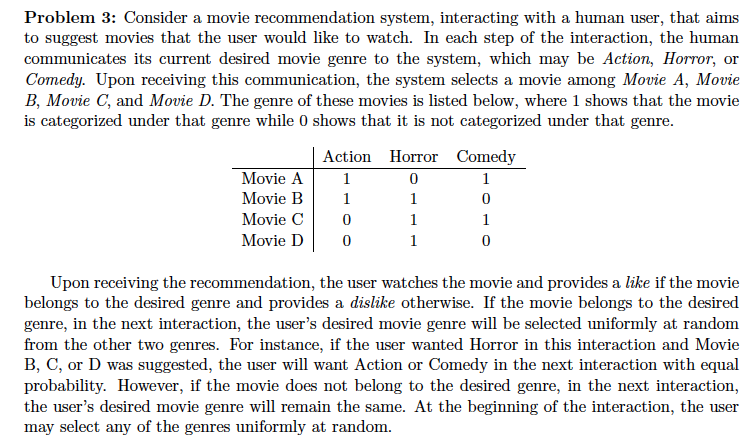

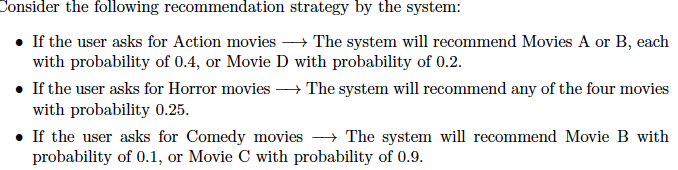

**Problem 3.3** Define the Markov chain that is induced by the policy given in Part 2 over the MDP you
introduced in Part 1; in particular, specify all elements of the Markov chain.

**Answer:** Please refer to the handwritten homework pages 8 and 9 and below computation for matrices as combined answer.

In [8]:
import numpy as np

# Define the policy pi(a|s): States: 0= Action, 1= Horrror, 2= Comedy and Actions: 0= Movie_A, 1= Movie_B, 2= Movie_C, 3= Movie_D
pi = np.zeros((3, 4))

# Policy declaration Pi(a|s)
pi[0, 0] = 0.4  # Movie_A for Action
pi[0, 1] = 0.4  # Movie_B for Action
pi[0, 3] = 0.2  # Movie_D for Action
pi[1, :] = 0.25  # uniform for Horror
pi[2, 1] = 0.1  # Movie_B for Comedy
pi[2, 2] = 0.9  # Movie_C for Comedy
# print("Policy matrix:\n", pi)

# Genre matching I(s, a): 1 if movie a matches genre s, and if doesn't match
# its 0 otherwise. Provided.
I = np.array([
    [1, 0, 1],  # Movie_A: Action=1, Horror=0, Comedy=1
    [1, 1, 0],  # Movie_B: Action=1, Horror=1, Comedy=0
    [0, 1, 1],  # Movie_C: Action=0, Horror=1, Comedy=1
    [0, 1, 0]   # Movie_D: Action=0, Horror=1, Comedy=0
]).T

# Transition matrix P^pi (3x3)
P_pi = np.zeros((3, 3))
for s in range(3):
  for a in range(4):
    if pi[s, a] == 0:
      continue
    if I[s, a] == 1:  # Match: switch (prob 0.5)
      for sp in range(3):
        if sp != s:
          P_pi[s, sp] += pi[s, a] * 0.5
    else:  # No match: stay in s (prob 1)
      P_pi[s, s] += pi[s, a] * 1.0

print("Transition Matrix P^pi:")
print(P_pi)

# Expected rewards R^pi(s): sum pi(a|s) * r(s,a), where r= +1 if match, -1 else
R_pi = np.zeros(3)
for s in range(3):
  r_sa = 2 * I[s, :] - 1
  R_pi[s] = np.sum(pi[s, :] * r_sa)

print("\nExpected Rewards R^pi:")
print(R_pi)

Transition Matrix P^pi:
[[0.2   0.4   0.4  ]
 [0.375 0.25  0.375]
 [0.45  0.45  0.1  ]]

Expected Rewards R^pi:
[0.6 0.5 0.8]


**Problem 3.4.** Now, suppose the user’s next desired movie genre was dependent not only on its last desired
genre (and the recommended movie) but also the desired genre before that. Show a graphical
representation of the temporal evolution of the model in this case.

**Answer:**
Second-Order MDP Temporal Evolution See graph below.



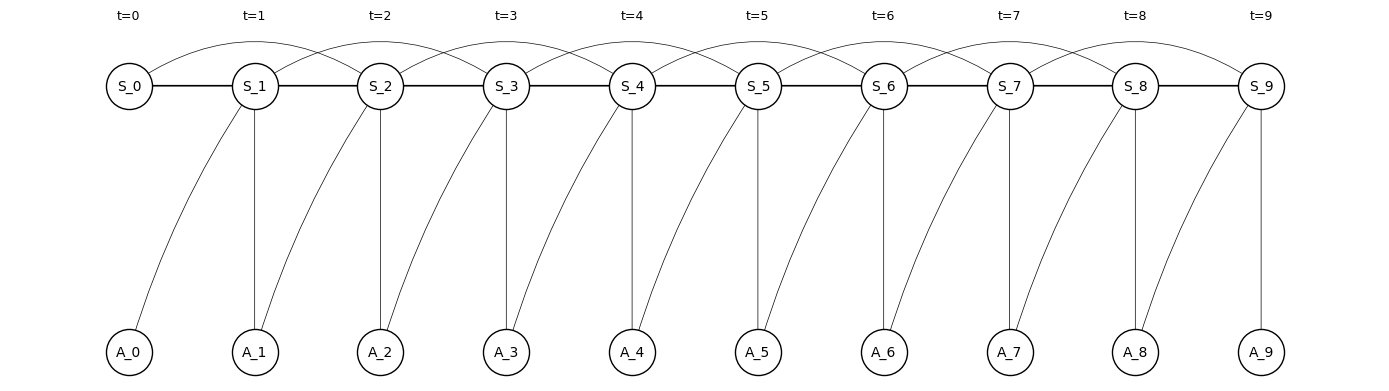

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

T =9
G = nx.DiGraph()

x_gap = 2.0
y_s, y_a = 0.8, -0.2

pos = {}
for t in range(T+1):
  pos[f"S_{t}"] = (t*x_gap, y_s); G.add_node(f"S_{t}")
  pos[f"A_{t}"] = (t*x_gap, y_a); G.add_node(f"A_{t}")


policy_edges = []                 # S_t -> A_t
env_edges_first = []              # S_{k-1} -> S_k
env_edges_second_top_red = []     # S_{k-2} -> S_k
act_to_state_edges = []           # A_{k-1} -> S_k

# policy edges
for t in range(1, T+1):
  policy_edges.append((f"S_{t}", f"A_{t}"))
for k in range(1, T+1):
  env_edges_first.append((f"S_{k-1}", f"S_{k}"))
  if k >= 2:
      env_edges_second_top_red.append((f"S_{k-2}", f"S_{k}"))
  act_to_state_edges.append((f"A_{k-1}", f"S_{k}"))

plt.figure(figsize=(14, 4))

# nodes + labels
nx.draw_networkx_nodes(G, pos, node_color='white', edgecolors='black',
                       node_size=1100, linewidths=1.0)
nx.draw_networkx_labels(G, pos, font_size=10)

# S_{k-1} -> S_k
nx.draw_networkx_edges(
    G, pos, edgelist=env_edges_first, arrows=True, arrowstyle='->',
    width=1.2, connectionstyle='arc3,rad=0.0', edge_color='black'
)

nx.draw_networkx_edges(
    G, pos, edgelist=env_edges_second_top_red, arrows=True, arrowstyle='->',
    width=0.5, connectionstyle='arc3,rad=-0.35', edge_color='black', alpha=0.95
)

# A_{k-1} -> S_k
nx.draw_networkx_edges(
    G, pos, edgelist=act_to_state_edges, arrows=True, arrowstyle='->',
    width=0.5, connectionstyle='arc3,rad=-0.08', edge_color='black'
)

# S_t -> A_t
nx.draw_networkx_edges(
    G, pos, edgelist=policy_edges, arrows=True, arrowstyle='->',
    width=0.5, connectionstyle='arc3,rad=0.0', edge_color='black'
)

# time labels
for t in range(T+1):
    plt.text(t*x_gap, 1.05, f"t={t}", ha="center", fontsize=9)
plt.axis('off'); plt.tight_layout(); plt.show()


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
def preprocess(dir):
    # To deal with the error when there is [] in the path
    dir.replace('[','[[]')
    dir.replace(']','[]]')
    return dir

########################        YOUR CODE        ##########################

your_ipynb_file_dir = '/content/drive/MyDrive/Colab_Notebooks/ECE595RL/ECE 59500: Reinforcement Learning HW2.ipynb'

########################      END YOUR CODE      ##########################

!jupyter nbconvert --to html '{preprocess(your_ipynb_file_dir)}'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/ECE595RL/ECE 59500: Reinforcement Learning HW2.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 762841 bytes to /content/drive/MyDrive/Colab_Notebooks/ECE595RL/ECE 59500: Reinforcement Learning HW2.html
